In [2]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('twitter_training.csv',names=["id","company","kind","tweet"])
df.head()

,id,company,kind,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.tail()

,id,company,kind,tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [6]:
del df["id"]

In [7]:
df.isnull().sum()

company      0
kind         0
tweet      686
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

company    0
kind       0
tweet      0
dtype: int64

In [11]:
vc_df = (pd.DataFrame(df['kind'].value_counts())).reset_index()
vc_df.columns = ['kind', 'Count'] 
vc_df

,kind,Count
0,Negative,22358
1,Positive,20655
2,Neutral,18108
3,Irrelevant,12875


In [12]:
df['twt'] = df['tweet'].str.replace("[^a-zA-Z0-9]", " ")
df = df[["company","kind","tweet","twt"]]
df.head()

C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_18464\3141071097.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['twt'] = df['tweet'].str.replace("[^a-zA-Z0-9]", " ")


,company,kind,tweet,twt
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [13]:
df['twt'] = df['twt'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df.head()

,company,kind,tweet,twt
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands and will murder you all
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming the borders and will kill you all
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands and will kill you all
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands and will murder you all
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands and will murder you all


In [14]:
df['twt'] = [review.lower() for review in df['twt']]
df.head()

,company,kind,tweet,twt
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands and will murder you all
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming the borders and will kill you all
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands and will kill you all
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands and will murder you all
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands and will murder you all


In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['twt'] = [remove_stopwords(r) for r in df['twt']]

[nltk_data] Downloading package punkt to C:\Users\Prayag
[nltk_data]     Chawla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Prayag
[nltk_data]     Chawla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['twt'] = df['twt'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to C:\Users\Prayag
[nltk_data]     Chawla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Prayag
[nltk_data]     Chawla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prayag Chawla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


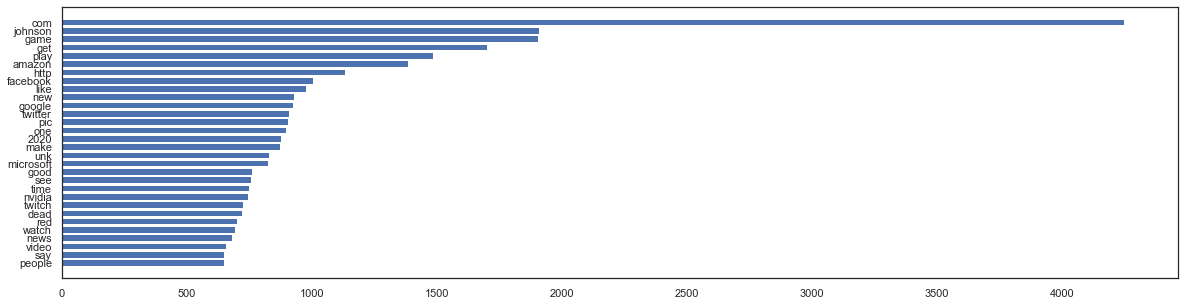

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Neutral',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

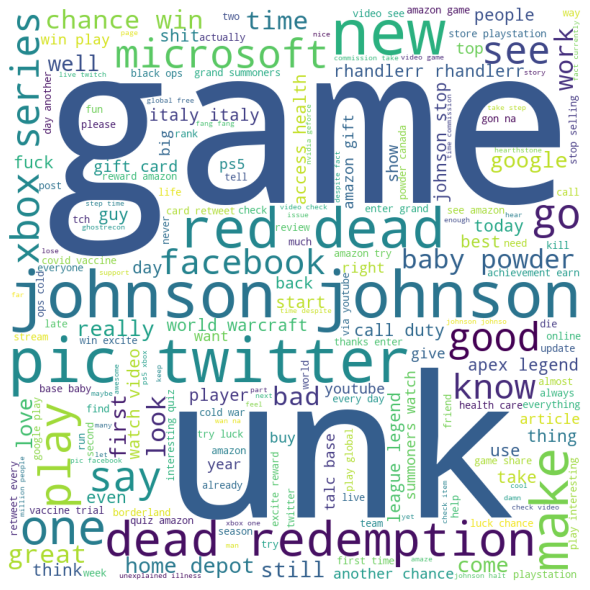

In [19]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['kind'] == 'Neutral',:]
all_words = ' '.join([text for text in word_cloud_df['twt']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

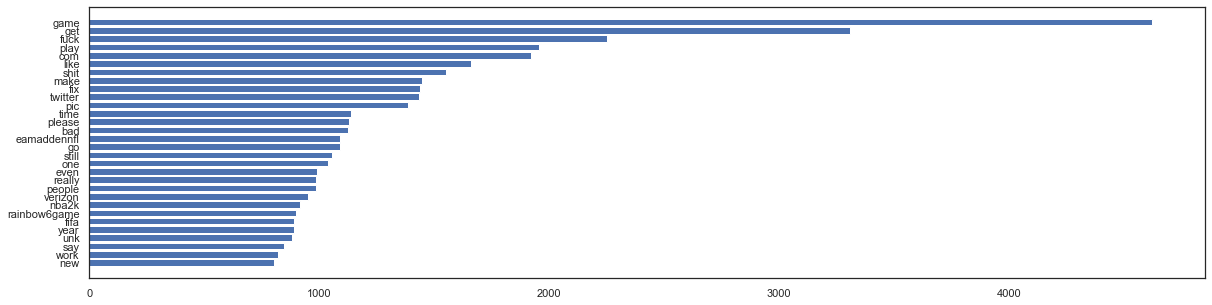

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

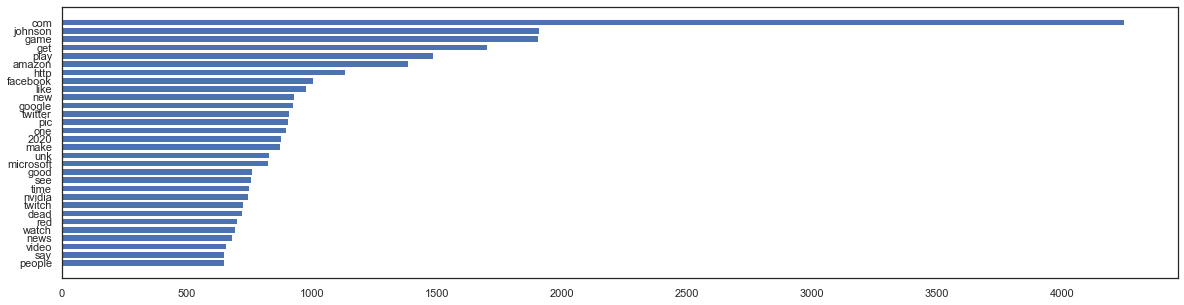

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Neutral',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

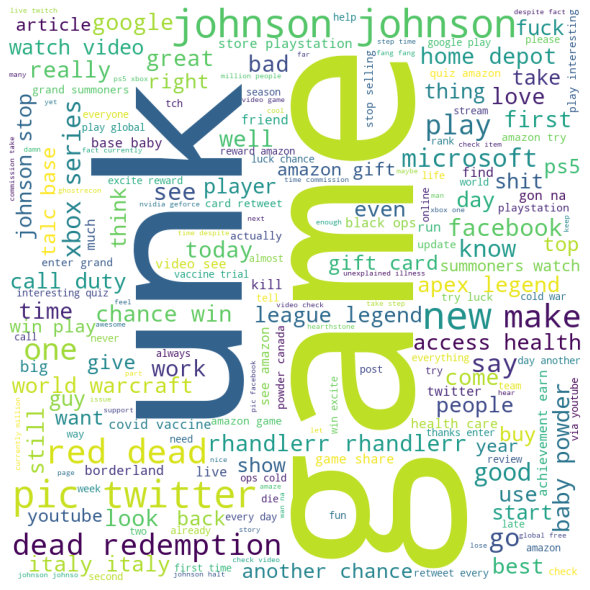

In [22]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['kind'] == 'Neutral',:]
all_words = ' '.join([text for text in word_cloud_df['twt']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

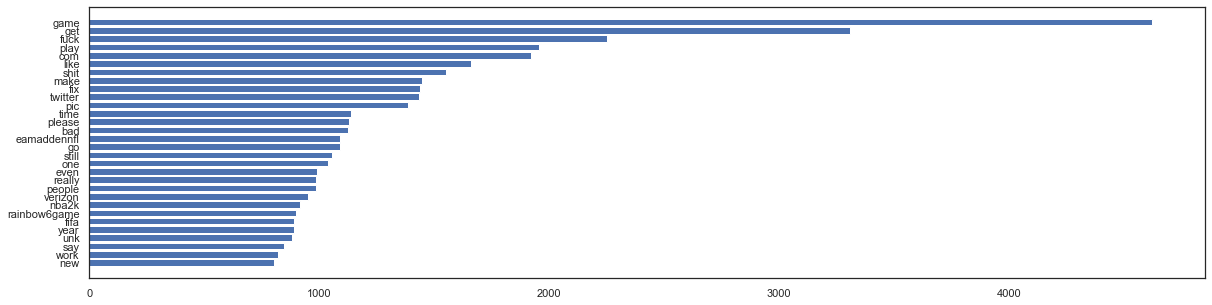

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

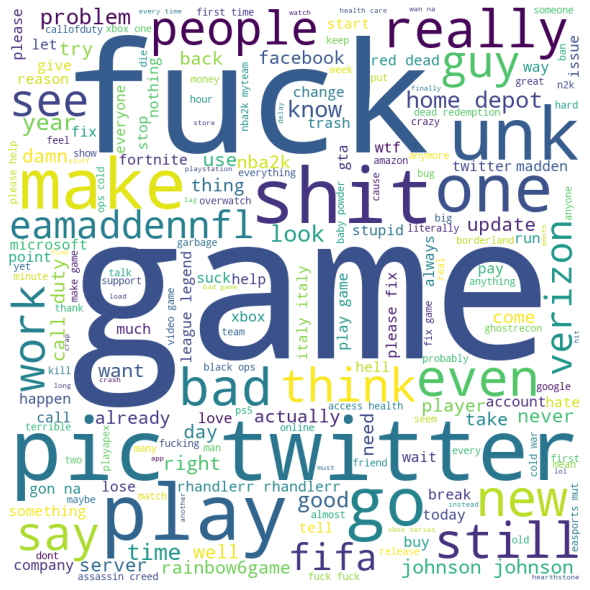

In [24]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['kind'] == 'Negative',:]
all_words = ' '.join([text for text in word_cloud_df['twt']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

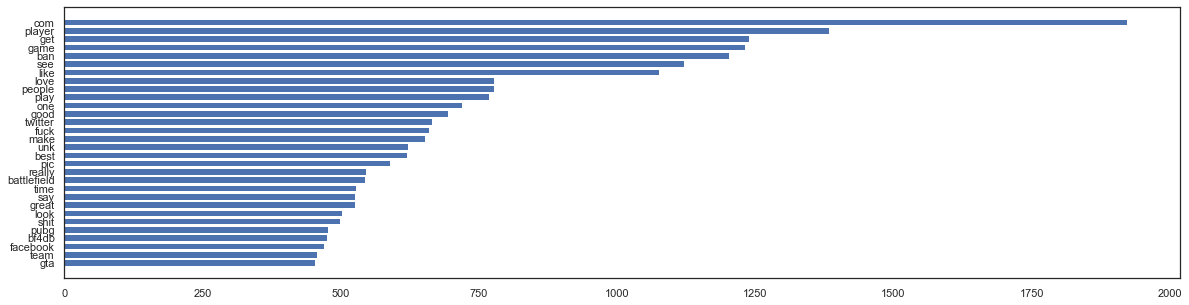

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['kind'] == 'Irrelevant',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['twt']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

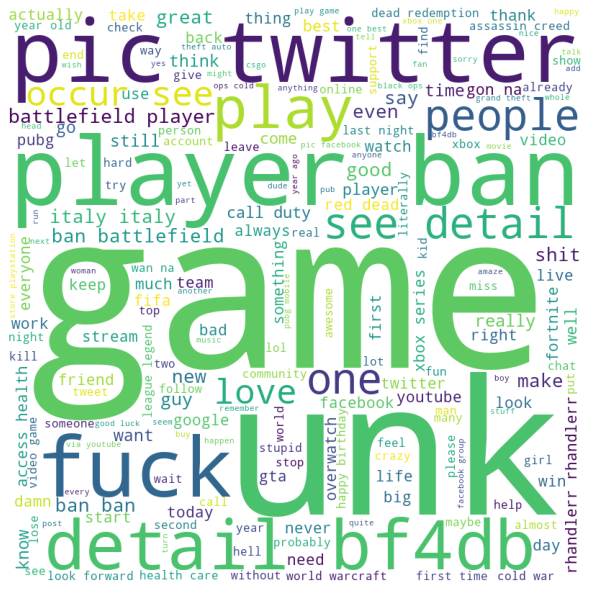

In [26]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['kind'] == 'Irrelevant',:]
all_words = ' '.join([text for text in word_cloud_df['twt']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

In [28]:
df['kind']=df['kind'].map({'Positive':1, 'Neutral':2, 'Negative':0, 'Irrelevant':3})

In [29]:
X = tfidf.fit_transform(df['twt']).toarray()
y = df['kind'].values
featureNames = tfidf.get_feature_names()

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30)

C:\Users\Prayag Chawla\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test),multi_class="ovo")

0.9380208333333333

In [32]:
X = tfidf.fit_transform(df['twt']).toarray()
y = df["kind"].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto")
rf_model.fit(X_train, y_train)

C:\Users\Prayag Chawla\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50)

In [34]:
predictions = rf_model.predict(X_test)
predictions

array([2, 0, 3, ..., 1, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model.predict_proba(X_test),multi_class="ovo")

0.9707604233288206

In [36]:
featureImportance = pd.DataFrame({i : j for i,j in zip(rf_model.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
457,0.011686,com
1321,0.009404,love
931,0.006944,fuck
719,0.006873,eamaddennfl
990,0.006616,good
...,...,...
39,0.000006,40gb
232,0.000006,battlepass
1030,0.000003,hakusho
2157,0.000002,symmetric
